In [1]:
'''
【课程3.3.2】  最邻近分类的python实现方法

在距离空间里，如果一个样本的最接近的k个邻居里，绝大多数属于某个类别，则该样本也属于这个类别

电影分类 / 植物分类

'''

'\n【课程3.3.2】  最邻近分类的python实现方法\n\n在距离空间里，如果一个样本的最接近的k个邻居里，绝大多数属于某个类别，则该样本也属于这个类别\n\n电影分类 / 植物分类\n\n'

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

   fight  kiss     name     type
0      3   104  北京遇上西雅图  Romance
1      2   100      喜欢你  Romance
2      1    81    疯狂动物城  Romance
3    101    10      战狼2   Action
4     99     5       力王   Action
5     98     2      敢死队   Action
预测电影类型为: ['Action']


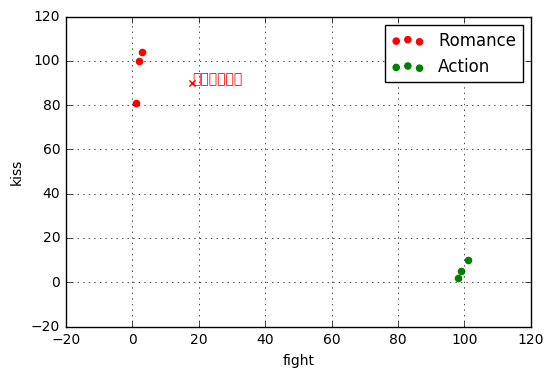

In [44]:
#  案例一：电影数据分类

from sklearn import neighbors  # 导入KNN分类模块
import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

data = pd.DataFrame({'name':['北京遇上西雅图','喜欢你','疯狂动物城','战狼2','力王','敢死队'],
                    'fight':[3,2,1,101,99,98],
                  'kiss':[104,100,81,10,5,2],
                  'type':['Romance','Romance','Romance','Action','Action','Action']})
print(data)

knn = neighbors.KNeighborsClassifier()
knn.fit(data[['fight','kiss']],data['type'])
print('预测电影类型为:',knn.predict([8,8]))
# 加载数据，构建KNN分类模型
# 预测未知数据

plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type']=='Romance']['kiss'],color = 'r',label = 'Romance')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type']=='Action']['kiss'],color ='g',label = 'Action')
plt.grid()
plt.legend()
plt.scatter(18,90,color = 'r',marker = 'x',label = 'Romance')
plt.ylabel('kiss')
plt.xlabel('fight')
plt.text(18,90,'《你的名字》',color = 'r')
# 绘制图表

       fight       kiss     type
0   6.557019  13.660053  Romance
1  30.232562  27.064733   Action
2  25.930797  26.540431   Action
3  39.490557  39.924277   Action
4   8.335552  11.131188   Action


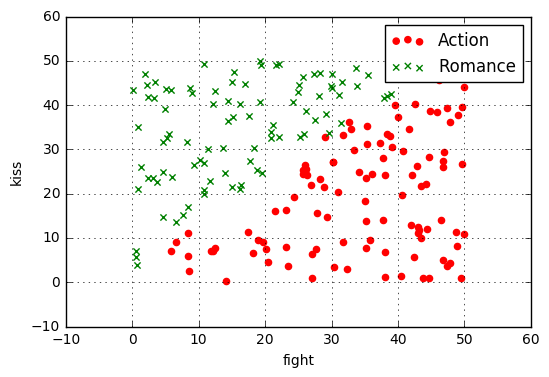

In [54]:
#案例一 电影分类预测
data2 = pd.DataFrame(np.random.rand(200,2)*50,columns = ['fight','kiss'])

data2['type'] = knn.predict(data2)
print(data2.head())

plt.scatter(data2[data2['type'] == 'Action']['fight'],data2[data2['type']=='Action']['kiss'],label = 'Action',color = 'r',marker='o')
plt.scatter(data2[data2['type'] == 'Romance']['fight'],data2[data2['type']=='Romance']['kiss'],label = 'Romance',color = 'g',marker='x')
plt.grid()
plt.legend()
plt.xlabel('fight')
plt.ylabel('kiss')

In [63]:
#案例二 植物分类
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print('数据长度为:%i条' % len(iris['data']))

print(iris.feature_names)
print(iris.target_names)
print(iris.data[:5])

dict_keys(['DESCR', 'feature_names', 'target_names', 'data', 'target'])
数据长度为:150条
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [76]:
#案例二 植物分类
df = pd.DataFrame(iris.data,columns = iris.feature_names)

df['target'] = iris.target

ty = pd.DataFrame({'target':[0,1,2],
                  'target_names':iris.target_names})
df = pd.merge(df,ty,on = 'target')
print(df.head())

knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data,df['target_names'])

test_data = [[0.1,2,0.3,0.5]]
print('预测结果为：',knn.predict(test_data))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  
预测结果为： ['setosa']
